<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/tf_coursera_fashion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data from Tensorflow dataset


In [1]:
import tensorflow as tf

print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
fmnist= tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)= fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Visualize the data

Label 9
Image Pixel Array : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   

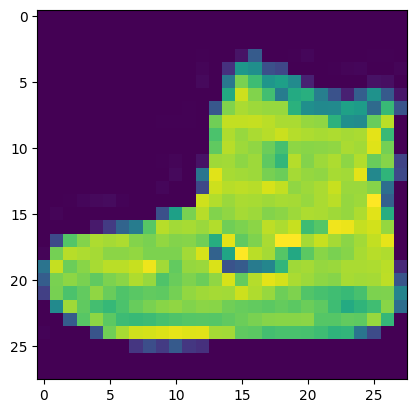

In [4]:
import numpy as np
import matplotlib.pyplot as plt

index=0
np.set_printoptions(linewidth=320)
print(f"Label {train_labels[index]}")
print(f"Image Pixel Array : {train_images[index]}")

plt.imshow(train_images[index])

# Model the vision data


## Exercise 1

### Build and compile the model

In [49]:
import tensorflow as tf
from tensorflow.keras import layers

model_1= tf.keras.Sequential([
    layers.Input(shape=(28,28))
    ,layers.Rescaling(scale=1/255.)
    ,layers.Flatten()
    ,layers.Dense(128, activation="relu")
    ,layers.Dense(10,activation="softmax")
])

model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [50]:
model_1_hist= model_1.fit(train_images,train_labels
                          ,validation_data=(test_images,test_labels)
                          ,batch_size=32
                          ,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4966 - accuracy: 0.8258 - val_loss: 0.4219 - val_accuracy: 0.8492
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3735 - accuracy: 0.8636 - val_loss: 0.3869 - val_accuracy: 0.8617
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3347 - accuracy: 0.8771 - val_loss: 0.3684 - val_accuracy: 0.8656


### Evaluate the model


In [51]:
model_1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.8656


[0.3683791160583496, 0.8655999898910522]

### Perform Prediction

In [52]:
model_1_pred_proba= model_1.predict(tf.expand_dims(test_images[0],axis=0))
model_1_pred= tf.argmax(tf.squeeze(model_1_pred_proba))
model_1_pred


1/1 [==============================] - 0s 62ms/step


<tf.Tensor: shape=(), dtype=int64, numpy=9>

## Exercise 2

### Build and compile the model

In [56]:
import tensorflow as tf
from tensorflow.keras import layers

model_2= tf.keras.Sequential([
    layers.Input(shape=(28,28))
    ,layers.Rescaling(scale=1/255.)
    ,layers.Flatten()
    ,layers.Dense(512,activation="relu")
    ,layers.Dense(10,activation="softmax")
])

model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [57]:
model_2_hist= model_2.fit(train_images,train_labels,
                          validation_data=(test_images,test_labels)
                          ,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4708 - accuracy: 0.8329 - val_loss: 0.3868 - val_accuracy: 0.8639
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3583 - accuracy: 0.8690 - val_loss: 0.3736 - val_accuracy: 0.8665
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3220 - accuracy: 0.8827 - val_loss: 0.3512 - val_accuracy: 0.8722


### Evaluate the model

In [27]:
model_2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3674 - accuracy: 0.8644


[0.3673507571220398, 0.8644000291824341]

### Perfrom Prediction

In [53]:
model_2_pred_proba= model_2.predict(tf.expand_dims(test_images[0],axis=0))
model_2_pred= tf.argmax(tf.squeeze(model_2_pred_proba))
model_2_pred

1/1 [==============================] - 0s 92ms/step


<tf.Tensor: shape=(), dtype=int64, numpy=9>

## Convolutional Neural Network

### Build and compile model

In [79]:
import tensorflow as tf
from tensorflow.keras import layers

model_3= tf.keras.Sequential([
    layers.Input(shape=(28,28,1))
    ,layers.Rescaling(scale=1/255.)
    ,layers.Conv2D(filters=32, kernel_size=3,activation="relu")
    ,layers.MaxPool2D(2,2)
    ,layers.Conv2D(filters=32, kernel_size=3,activation="relu")
    ,layers.MaxPool2D(2,2)
    ,layers.Flatten()
    ,layers.Rescaling(scale=1/255.)
    ,layers.Dense(128,activation="relu")
    ,layers.Dense(10,activation="softmax")
])

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"])

model_3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 800)             

### Train the model

In [80]:
model_3_hist= model_3.fit(train_images,train_labels,
                          validation_data=(test_images,test_labels)
                          ,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 54s 28ms/step - loss: 0.7465 - accuracy: 0.7233 - val_loss: 0.5612 - val_accuracy: 0.7870
Epoch 2/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5039 - accuracy: 0.8140 - val_loss: 0.4851 - val_accuracy: 0.8207
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4425 - accuracy: 0.8376 - val_loss: 0.4359 - val_accuracy: 0.8435


### Evaluate the model

### Perform Prediction